In [301]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, beta, uniform

# Question 7.6

Sampling from the standard normal distribution $10^5$ times, calculate a Monte Carlo estimate of the value of $\int_{3}^{\infty}e^{\frac{x^2}{2}}dx$, and estimate the standard error. Repeat the problem, sampling instead from $\mathcal{N}(3,1)$, as in (7.2).

In [302]:
# Define the integrand function
def integrand(x):
    return np.exp(-(x ** 2)/2)

# Define parameters mu, sigma, and n
mu = 3
sigma = 1
n = 10**5

# Define the pdf function for Normal(3, 1)
def pdf(x):
    return norm.pdf(x, mu, sigma)

# Draw the normal and uniform distributions
X = np.random.normal(3, 1, n)
X1 = np.random.normal(0, 1, n)

# We can rewrite the integral as a composition from the indicator function and the pdf with infinite bounds

# Make a mask of the distribution if it is greater than 3 and calculate the mean
mask = (X1 >= 3) * np.sqrt(2 * np.pi)
estimate = np.mean(mask)
print("Monte-Carlo Mean: " + str(estimate))

# Calculate the standard Error
se = np.std(mask) / np.sqrt(n)
print("Monte-Carlo SE: " + str(se))

# Make an indicator function for the distribution if it is greater than 3
def indicator(x, a):
    mask = (np.array(x) >= a)
    return mask

# Repeat the process using the Normal distribution
adjustedsample = (indicator(X,3) * integrand(X)) / pdf(X)
estimate = np.mean(adjustedsample)
print("Normal(3,1) Mean : " + str(estimate))

# Calculate the standard Error
se = np.std(adjustedsample) / np.sqrt(n)
print("Normal(3,1) SE: " + str(se))

Monte-Carlo Mean: 0.0026570259711088604
Monte-Carlo SE: 0.000257936361116443
Normal(3,1) Mean : 0.003372038136975122
Normal(3,1) SE: 1.9708143993207337e-05


# Question 7.7

Use importance sampling, drawing from Beta $(a,b)$ for various values of $a$ and $b$, to estimate the integral $\int_{0}^{2\pi}\frac{dx}{x^3+x+1}$. Find values of $a$, and $b$ and sample size $n$ that give a standard error less than $10^{-3}$.

Hint: The domain of Beta $(a,b)$ is [0,1], but the integral is to be evaluated over $[0,2\pi]$, so you will need to do a change of variables to be able to calculate this with samples from Beta $(a,b)$.

In [303]:
# u = 2pix so du = 2pi du
# let a = 1, and b = 2pi
# so the integral is 2pi * integral from 0 to 1 of f(x)dx

# Define the integrand function
def integrand(x):
    return 2 * np.pi / ((2* np.pi * x)**3 +(2* np.pi * x) + 1 )

# Define parameters a, b, and n
a = 1/5
b = 1
n = 10**6

# Define the pdf function for Beta(1, 2pi)
def pdf(x):
    return beta.pdf(x, a, b)

# Draw from the beta and uniform distributions
X = np.random.beta(a, b, n)

# Calculate the mean
estimate = np.mean(integrand(X) / pdf(X))
print("Importance Sampling Estimate: " + str(estimate))

# Calculate the standard Error
se = np.std(integrand(X) / pdf(X)) / np.sqrt(n)
print("Importance Sampling SE: " + str(se))
print("Our parameters make our SE less than 0.001")

Importance Sampling Estimate: 0.9085837803013812
Importance Sampling SE: 0.000907903469227175
Our parameters make our SE less than 0.001


# Question 7.8.iii

iii) Thus, a draw from the exponential distribution can be constructed by drawing $u$ from Uniform(0,1) and computing $- \frac{\log(1-y)}{\lambda}$. Write code to implement this, and use your code to draw $10^5$ times from Gamma(1,2). Plot a normed histogram of your results, and, on the same graph, plot the pdf of the exponential distribution for comparison.

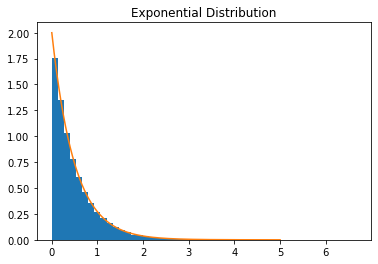

In [304]:
# set parameters n, and lambda
n = 10**5
lam = 2

# define the function
def function(x):
    return -np.log(x) / lam

# Define a pdf function
def pdf(x):
    return lam * np.exp(-lam * x)

# draw from the uniform distribution and make it an exponential distribution, also make linspace
U = np.random.uniform(0, 1, n)
U = function(U)
x = np.linspace(0, 5, n)

# plot the histogram of the exponential distribution
plt.hist(U, bins = 50, density = True)
plt.title("Exponential Distribution")
plt.plot(x, pdf(x))

# Question 7.9.ii-iii

ii) Code up the inversion sampling algorithm to sample from the logistic distribution, and use your code to deaw from the logisitc distribution $10^5$ times. Plot a normed histogram of your results, and on the same graph plot the pdf of the logistic distribution for comparison.

iii) Using your sample, estimate the mean and variance of the distribution.

Mean: 0.0007484666039932207
Variance: 0.010384857185279019


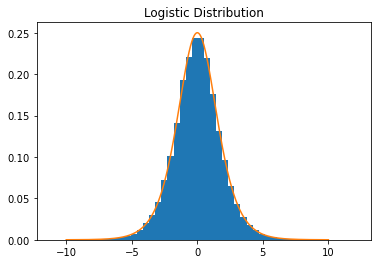

In [305]:
# set parameters n
n = 10**5

# define the function
def function(x):
    return np.log(x/(1-x))

# Define a pdf function
def pdf(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

# draw from the uniform distribution and make it an exponential distribution, also make linspace
U = np.random.uniform(0, 1, n)
U = function(U)
x = np.linspace(-10, 10, n)

# plot the histogram of the exponential distribution
plt.hist(U, bins = 50, density = True)
plt.title("Logistic Distribution")
plt.plot(x, pdf(x))

# Estimate the mean and the variance of the sample
mean = np.mean(U)
var = np.var(U) / np.sqrt(n)
print("Mean: " + str(mean))
print("Variance: " + str(var))

# Question 7.10

Code up a method for estimating the volume oof the unit ball in $d$-dimensional space using rejection sampling. Compute estimates for these values for $d\in \{1,\dots,10\}$ using enough samples to get a standard error less than $10^{-2}$.

In [306]:
# set parameters n and dimensions d
n = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# loop through all 10 dimensions
for i in d:
    subtract = 0

    # loop through all n samples and draw from the uniform distribution
    for j in range(n):
        sum = 0
        U = np.random.uniform(0, 1,i)

        # loop through you uniform distribution to see if it is in the unit ball
        for k in U:
            sum += k **2

            # if it is out of the unit ball, subtract 1 from the total
            if sum > 1:
                subtract += 1
                break

    # Construct a vector of 1's, and subtract the number of samples that are out of the unit ball
    x = np.ones(n)
    for t in range(subtract):
        x[t] = 0

    # Scale the vector by the volume of the unit ball
    x = x * 2 ** i

    # Calculate the mean and the variance and then print them
    print("Volume of " + str(i)+"-D: " + str(np.mean(x)))
    print("Error of " + str(i)+"-D: " + str(np.std(x) / np.sqrt(n)))

Volume of 1-D: 2.0
Error of 1-D: 0.0
Volume of 2-D: 3.138648
Error of 2-D: 0.0016442264844284623
Volume of 3-D: 4.18956
Error of 3-D: 0.00399550585112824
Volume of 4-D: 4.938064
Error of 4-D: 0.007390842166621069
Volume of 5-D: 5.281792
Error of 5-D: 0.01187939465076971
Volume of 6-D: 5.150208
Error of 6-D: 0.01740944196569023
Volume of 7-D: 4.73792
Error of 7-D: 0.024166213482331066
Volume of 8-D: 4.015104
Error of 8-D: 0.03180794812415891
Volume of 9-D: 3.337216
Error of 9-D: 0.04120094151071483
Volume of 10-D: 2.619392
Error of 10-D: 0.05172423216975131


# Question 7.11

Let $P$ be a distribution on $[0,\infty)$ with pdf equal to $f_{P} = \frac{1}{Z}e^{-x^2-x^3}$ for sampling with proposal distribution $Q \sim \text{Gamma}(1,1)$ to sample from this distribution as follows:

i) Find the smallest $m$ for which $e^{-x^2-x^3} \leq me^{-x}$

ii) Find the smallest $M$ (expressed in terms of $m$ and $Z$) for which $f_{P}\leq Mf_{Q}(x)$ for all $x\in [0, \infty)$. Show that the quanity $\frac{f_{P}(x)}{Mf_{Q}(x)}$ can be computed without knowing $Z$.

iii) Code up a rejection sampler that draws $z$ from Gamma(1,1) (using either a sample you wrote for Exercise 7.8 or another sampler), draws $u$ from Uniform([0,1]), and reject any $z$ such that the corresponding $u$ is greater than $\frac{f_{P}(z)}{Mf_{Q}(z)}$.

iv) Use your sampling method to draw $10^5$ times from $P$, and plot a normed histogram of the results, along with a plot of the pdf $f_{P}(x)$ (this last plot will require you to approximate $Z$).

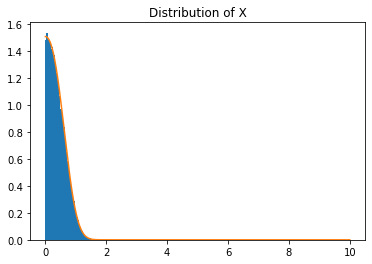

In [307]:
# set parameters n and m 
n = 10**5
m = np.exp(5/27)

# draw from the Gamma and uniform distributions
draw = np.array(gamma.rvs(1, size = n))
U = np.random.uniform(0, 1, n)

# Define the function
def function(x):
    return np.exp(-x**2 -x**3)

# Define the pdf function
def pdf(x):
    return np.exp(-x)

# calculate the ratio of the function and the pdf
dist = []
j = 0

# loop through the Gamma distribution and calculate the ratio
for i in draw:
    if U[j] < function(i) / (m * pdf(i)):
        dist.append(i)
    j += 1
    
# plot the histogram of the distribution
plt.hist(dist, bins = 50, density = True)
plt.title("Distribution of X")

# get the linspace and plot the function
x = np.linspace(0, 10, 1000)
plt.plot(x, function(x)/.6637)
plt.show()